# Verify that your system is set up correctly

## Import the Pandas and Seaborn libraries

In [1]:
import pandas as pd
import seaborn as sns

## Use Pandas to read the Mortality data and display it in a table

In [2]:
mortality_data = pd.read_csv('mortality.csv')

In [3]:
mortality_data

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


## Use Seaborn to plot the Mortality data

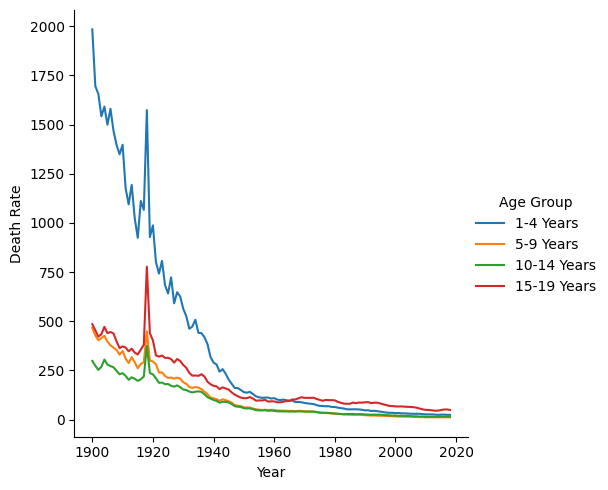

In [4]:
sns.relplot(data=mortality_data, kind='line',
            x='Year', y='Death Rate', hue='Age Group')

## Read Fires data from a SQLite database

In [5]:
import sqlite3
fires_con = sqlite3.connect('FPA_FOD_20170508.sqlite')
fires_cur = fires_con.cursor()
type(fires_con)

sqlite3.Connection

In [6]:
fires_sql = """
            SELECT fire_name, fire_size,
                state, latitude, longitude,
                fire_year, 
                DATETIME(discovery_date) AS discovery_date,
                DATETIME(cont_date) AS contain_date
            FROM Fires
            WHERE fire_size > 5000
            """
fires = pd.read_sql_query(fires_sql, fires_con)
fires.head()

,FIRE_NAME,FIRE_SIZE,STATE,LATITUDE,LONGITUDE,FIRE_YEAR,discovery_date,contain_date
0,POWER,16823.0,CA,38.523333,-120.211667,2004,2004-10-06 00:00:00,2004-10-21 00:00:00
1,FREDS,7700.0,CA,38.780000,-120.260000,2004,2004-10-13 00:00:00,2004-10-17 00:00:00
2,THREE,16100.0,AZ,33.723333,-111.275000,2005,2005-06-21 00:00:00,2005-06-29 00:00:00
3,FORK,11936.0,NM,33.613333,-108.558889,2005,2005-05-29 00:00:00,2005-08-29 00:00:00
4,MASON,11357.0,CO,38.169722,-105.038056,2005,2005-07-07 00:00:00,2005-07-16 00:00:00


## Plot some of the Fires data

<Axes: title={'center': 'Largest Fire in California by Year'}, xlabel='FIRE_YEAR', ylabel='Acres Burned'>

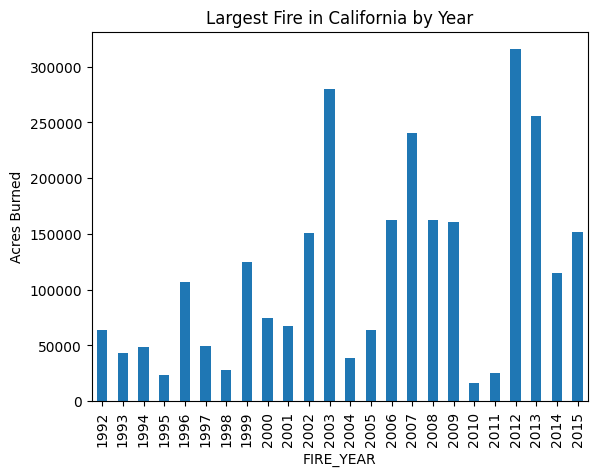

In [7]:
fires.query('STATE == "CA"') \
    .groupby('FIRE_YEAR')['FIRE_SIZE'].max() \
    .plot.bar(ylabel='Acres Burned', 
              title='Largest Fire in California by Year')